In [2]:
%pip install scikit-learn pandas seaborn matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
def get_histogram(df : pd.DataFrame, column : str) -> None:
    plt.hist(df[column])
    plt.show()

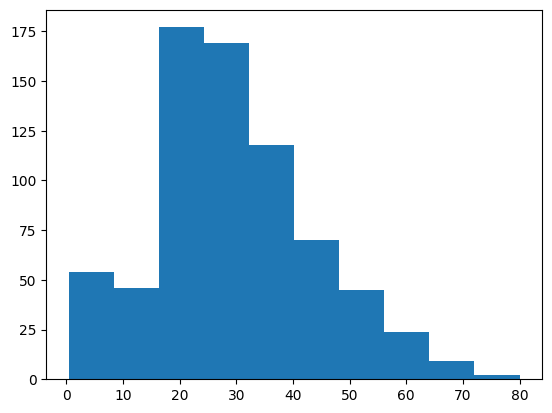

In [5]:
get_histogram(df, 'age')

In [18]:
from sklearn.impute import KNNImputer

def fill_na_column(df, column, approach, **args):
    approaches= {
        'knn' : fill_na_knn(df, column, args['n_neighbors']),
        'mean' : fill_na_mean(df, column)

    }
    df[column].fillna(approach)
    return

def fill_na_mean(df, column):
    mean_value = df[column].mean()
    return df[column].fillna(mean_value)



def fill_na_knn(df, column, n_neighbors=5):
    df = df.copy().select_dtypes(include=['int64', 'float64'])
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_array = imputer.fit_transform(df)
    df_imputed = pd.DataFrame(df_array, index=df.index, columns=df.columns)
    return df_imputed

In [21]:
def delete_column(df, column: str) -> pd.DataFrame:
    return df.copy().drop(columns=[column])

def delete_row(df, row_id) -> pd.DataFrame:
    return df.copy().drop([row_id])

def change_cell_value(df: pd.DataFrame, column: str, row_id: int, new_value: str | int | float)-> pd.DataFrame:
    df_changed = df.copy()
    df_changed.loc[column,row_id] = new_value
    return df_changed

def get_rows(df: pd.DataFrame, start_row: int, end_row: int) -> pd.DataFrame:
    return df.loc[start_row:end_row]

def get_data(file_name:str, file_type:str = 'csv') -> pd.DataFrame:
    file_types = {
        'csv': pd.read_csv, 
        'excel':pd.read_excel, 
        'json': pd.read_json,
        'xml': pd.read_xml,
        'html': pd.read_html,
        'sql': pd.read_sql
        }
    if file_type.lower() in list(file_types.keys()):
        df = file_types[file_type.lower()](file_name)
        return df
    else: 
        raise TypeError(f'Try using one of the supported following file types:\n{', '.join(list(file_types.keys()))}')